In [1]:
# importando o módulo de aprendizado de máquina de Regressão Logística

import pickle as pkl                                     # importando o módulo pickle para salvar o modelo em um arquivo
from sklearn.neural_network import MLPClassifier         # importando o módulo de rede neural do sklearn 
from sklearn.metrics import accuracy_score               # importando o módulo de métricas de precisão
from sklearn.metrics import confusion_matrix             # importando o módulo de matriz de confusão
from sklearn.metrics import classification_report        # importando o módulo de relatório de classificação
import seaborn as sns                                    # importando o módulo para visualização de gráficos

In [2]:
# leitura da base de dados que ja foram tratadas e salvas

with open('./data/census.pkl', 'rb') as f:
    X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pkl.load(f)

In [3]:
# visualizando o tamnho da base de dados

X_census_treinamento.shape, y_census_treinamento.shape, X_census_teste.shape, y_census_teste.shape

((27676, 108), (27676,), (4885, 108), (4885,))

In [9]:
# criando o modelo de rede neural e treinando
# modelo -> 3entrada -> 2oculta -> 2oculta -> 1saida 

nn_census = MLPClassifier( max_iter=1500,                 # numero máximo de iterações
                           verbose=True,                  # mostrar o processo de treinamento
                           tol=0.00001,                   # tolerância para parada
                           hidden_layer_sizes=(55, 55)    # tamanho das camadas ocultas
                          )

nn_census.fit(X_census_treinamento, y_census_treinamento)

Iteration 1, loss = 0.41361893
Iteration 2, loss = 0.32816447
Iteration 3, loss = 0.31681511
Iteration 4, loss = 0.30981030
Iteration 5, loss = 0.30459556
Iteration 6, loss = 0.30117624
Iteration 7, loss = 0.29781684
Iteration 8, loss = 0.29563232
Iteration 9, loss = 0.29227651
Iteration 10, loss = 0.29035390
Iteration 11, loss = 0.28755377
Iteration 12, loss = 0.28592338
Iteration 13, loss = 0.28389349
Iteration 14, loss = 0.28161957
Iteration 15, loss = 0.28046814
Iteration 16, loss = 0.27795046
Iteration 17, loss = 0.27652560
Iteration 18, loss = 0.27491258
Iteration 19, loss = 0.27377091
Iteration 20, loss = 0.27108091
Iteration 21, loss = 0.27035442
Iteration 22, loss = 0.26823109
Iteration 23, loss = 0.26648803
Iteration 24, loss = 0.26438452
Iteration 25, loss = 0.26375565
Iteration 26, loss = 0.26283191
Iteration 27, loss = 0.26058955
Iteration 28, loss = 0.25900067
Iteration 29, loss = 0.25747533
Iteration 30, loss = 0.25623176
Iteration 31, loss = 0.25451557
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(55, 55), max_iter=1500, tol=1e-05,
              verbose=True)

In [10]:
# previsão do modelo de rede neural

previsoes_nn = nn_census.predict(X_census_teste)
#previsoes_nn

In [11]:
# avaliando o modelo com a métrica de acurácia 

accuracy_score(y_census_teste, previsoes_nn)

0.8149437052200614

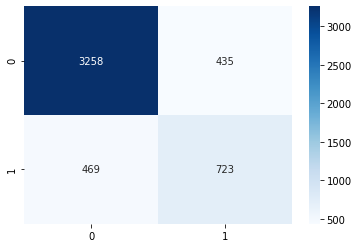

In [12]:
# avaliando o modelo com a matriz de confusão com heatmap do seaborn

cnn = confusion_matrix(y_census_teste, previsoes_nn)
sns.heatmap(cnn, annot=True, fmt='d', cmap='Blues');

In [13]:
# avaliando o modelo com o relatório de classificação

print(classification_report(y_census_teste, previsoes_nn))

              precision    recall  f1-score   support

       <=50K       0.87      0.88      0.88      3693
        >50K       0.62      0.61      0.62      1192

    accuracy                           0.81      4885
   macro avg       0.75      0.74      0.75      4885
weighted avg       0.81      0.81      0.81      4885

